# Analisando os preços das casas de Melbourne
- Vamos usar o seguinte dataset:
    - https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?select=melb_data.csv
    - Já retiramos algumas colunas para simplificar o nosso projeto (em projetos futuros, podemos trabalhar a base completa)

## Importando e entendendo a base

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
base = pd.read_csv("melb_data.csv")

In [3]:
print(base)

              Suburb           Address  Rooms Type        Price Method  \
0         Abbotsford      85 Turner St      2    h 1,480,000.00      S   
1         Abbotsford   25 Bloomburg St      2    h 1,035,000.00      S   
2         Abbotsford      5 Charles St      3    h 1,465,000.00     SP   
3         Abbotsford  40 Federation La      3    h   850,000.00     PI   
4         Abbotsford       55a Park St      4    h 1,600,000.00     VB   
...              ...               ...    ...  ...          ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h 1,245,000.00      S   
13576   Williamstown     77 Merrett Dr      3    h 1,031,000.00     SP   
13577   Williamstown       83 Power St      3    h 1,170,000.00      S   
13578   Williamstown      96 Verdon St      4    h 2,500,000.00     PI   
13579     Yarraville        6 Agnes St      4    h 1,285,000.00     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016   

## Tratando a base para usar no modelo

In [4]:
# Vou retirar as colunas que tiverem uma alta cardinalidade
base = base.drop(["Suburb","Address","SellerG","Date"],axis=1)

In [5]:
print(base)

       Rooms Type        Price Method  Distance  Postcode  Bedroom2  Bathroom  \
0          2    h 1,480,000.00      S      2.50  3,067.00      2.00      1.00   
1          2    h 1,035,000.00      S      2.50  3,067.00      2.00      1.00   
2          3    h 1,465,000.00     SP      2.50  3,067.00      3.00      2.00   
3          3    h   850,000.00     PI      2.50  3,067.00      3.00      2.00   
4          4    h 1,600,000.00     VB      2.50  3,067.00      3.00      1.00   
...      ...  ...          ...    ...       ...       ...       ...       ...   
13575      4    h 1,245,000.00      S     16.70  3,150.00      4.00      2.00   
13576      3    h 1,031,000.00     SP      6.80  3,016.00      3.00      2.00   
13577      3    h 1,170,000.00      S      6.80  3,016.00      3.00      2.00   
13578      4    h 2,500,000.00     PI      6.80  3,016.00      4.00      1.00   
13579      4    h 1,285,000.00     SP      6.30  3,013.00      4.00      1.00   

       Car  Landsize  Build

In [21]:
# Também vamos retirar colunas com mais de 20% de valores nulos
base = base.drop(["BuildingArea","YearBuilt"],axis=1)

In [22]:
# Visualizando a base restante
base.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,"1,480,000.00",S,2.50,"3,067.00",2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,2,h,"1,035,000.00",S,2.50,"3,067.00",2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,3,h,"1,465,000.00",SP,2.50,"3,067.00",3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,3,h,"850,000.00",PI,2.50,"3,067.00",3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,4,h,"1,600,000.00",VB,2.50,"3,067.00",3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


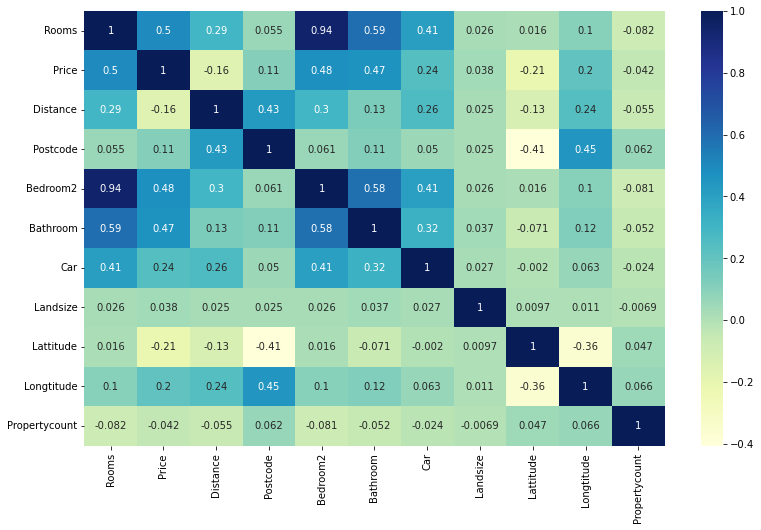

In [23]:
# Mostrando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(),annot=True,cmap="YlGnBu")
plt.show()

**Não teremos a correlação entre as variáveis de texto, para isso precisaríamos transformar em variáveis numéricas caso a gente queira usar essas variáveis**

In [24]:
# Vou escolher o que tiver correlação mais alta e Landsize pois retiramos o BuildingArea
base1 = base[["Price","Rooms","Bathroom","Bedroom2","Car","Landsize"]]

### Verificando a base tratada

In [25]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bathroom  13580 non-null  float64
 3   Bedroom2  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


**Ainda temos valores nulos na coluna "Car"**

In [26]:
# Tratando valores nulos: retirando esses valores
base1 = base1.dropna(axis=0)

In [27]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13518 non-null  float64
 1   Rooms     13518 non-null  int64  
 2   Bathroom  13518 non-null  float64
 3   Bedroom2  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13518 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 739.3 KB


In [28]:
base1.head()

,Price,Rooms,Bathroom,Bedroom2,Car,Landsize
0,"1,480,000.00",2,1.00,2.00,1.00,202.00
1,"1,035,000.00",2,1.00,2.00,0.00,156.00
2,"1,465,000.00",3,2.00,3.00,0.00,134.00
3,"850,000.00",3,2.00,3.00,1.00,94.00
4,"1,600,000.00",4,1.00,3.00,2.00,120.00


## Começando a criar nosso modelo de ML

**O primeiro passo vai ser separar entre a nossa variável que queremos prever (Y) e quais vão ser as colunas que vamos usar para essa previsão (X)**

In [29]:
Y = base1.Price
X = base1.drop('Price', axis=1)

**Em seguida, vamos separar a nossa base em treino e teste**
- A base de treino vai ser usada para treinar o modelo para que ele faça as previsões
- A base de teste vai ser usada para, ao usar o modelo já treinado, verificar o erro da previsão feita pelo modelo em relação aos valores reais

In [30]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

**O próximo passo é escolher o modelo que vamos usar**

### <font color='blue'>Regressão Linear</font>

In [36]:
# Importando o modelo
from sklearn.linear_model import LinearRegression

# Instanciando
modelo_regressao = LinearRegression()

# Realizando o fit do modelo
modelo_regressao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao = modelo_regressao.predict(x_teste)

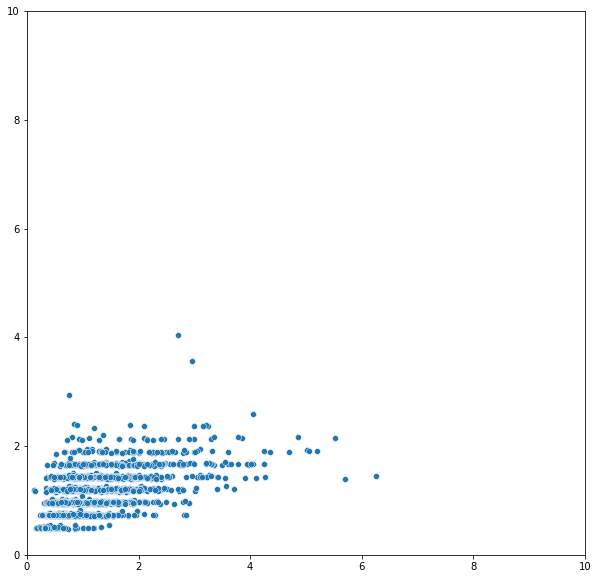

In [37]:
# Podemos visualizar os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

**Para avaliar o modelo, precisamos calcular os erros**

In [38]:
# Avaliando o erro quadrático médio
from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste,y_regressao)
print(erro_quadratico_regressao)

278042756554.8605


In [39]:
# Avaliando o R quadrado
from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste,y_regressao)
print(r2_regressao)

0.3022888192001315


### <font color='blue'>Regressão Linear: selecionando outras colunas </font>

In [40]:
# base1 = base1[["Price","Rooms","Bathroom","Bedroom2","Car","Longtitude","Lattitude","Distance","Landsize","Postcode","Propertycount"]]
base2 = base[["Price","Rooms","Bathroom","Bedroom2","Car","Longtitude","Lattitude","Distance","Landsize","Postcode","Propertycount"]]

In [41]:
# Verificando valores nulos e tratando
base2 = base2.dropna(axis=0)

base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13518 non-null  float64
 1   Rooms          13518 non-null  int64  
 2   Bathroom       13518 non-null  float64
 3   Bedroom2       13518 non-null  float64
 4   Car            13518 non-null  float64
 5   Longtitude     13518 non-null  float64
 6   Lattitude      13518 non-null  float64
 7   Distance       13518 non-null  float64
 8   Landsize       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Propertycount  13518 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.2 MB


**Vamos fazer as mesmas etapas que fizemos anteriormente**

In [42]:
# Separando a base
Y = base2.Price
X = base2.drop('Price', axis=1)

# Dividindo em treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

## Fazendo o fit para os novos dados
# Instanciando
modelo_regressao2 = LinearRegression()

# Realizando o fit do modelo
modelo_regressao2.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao2 = modelo_regressao2.predict(x_teste)

## Avaliando os erros
# Erro quadrático médio
erro_quadratico_regressao2 = mean_squared_error(y_teste,y_regressao2)
print(erro_quadratico_regressao2)

# R quadrado
r2_regressao2 = r2_score(y_teste,y_regressao2)
print(r2_regressao2)

210173649928.37207
0.4952057779937039


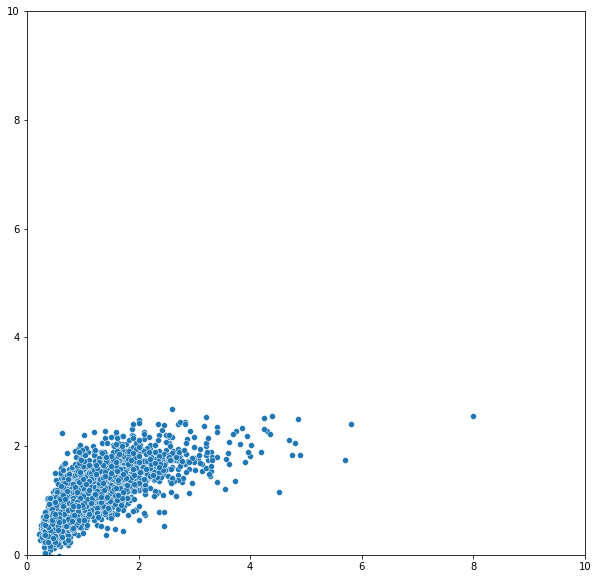

In [43]:
# Podemos visualizar os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao2/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

### <font color='blue'> Árvore de Decisão </font>
- Já vamos usar o mesmo treino e teste que fizemos na base anterior

In [44]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor

# Instanciando
modelo_arvore_decisao = DecisionTreeRegressor()

# Realizando o fit do modelo
modelo_arvore_decisao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [45]:
## Avaliando os erros
# Erro quadrático médio
erro_quadratico_arvore_decisao = mean_squared_error(y_teste,y_arvore_decisao)
print(erro_quadratico_arvore_decisao)

# R quadrado
r2_arvore_decisao = r2_score(y_teste,y_arvore_decisao)
print(r2_arvore_decisao)

192918637177.58893
0.5366487978023657


### Fazendo um resumo dos resultados

In [46]:
print('Regressão Linear')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao,2)))
print('R quadrado: '+ str(round(r2_regressao,4)))
print('-----------------------------------------')
print('Regressão Linear: novas features')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao2,2)))
print('R quadrado: '+ str(round(r2_regressao2,4)))
print('-----------------------------------------')
print('Árvore de Decisão')
print('Erro quadrático médio: ' + str(round(erro_quadratico_arvore_decisao,2)))
print('R quadrado: '+ str(round(r2_arvore_decisao,4)))

Regressão Linear
Erro quadrático médio: 278042756554.86
R quadrado: 0.3023
-----------------------------------------
Regressão Linear: novas features
Erro quadrático médio: 210173649928.37
R quadrado: 0.4952
-----------------------------------------
Árvore de Decisão
Erro quadrático médio: 192918637177.59
R quadrado: 0.5366
